# KMeans Clustering Implementation & Analysis

In this notebook, we'll use the scaled, non-outlier data from `engineering.ipynb` to implement a KMeans clustering algorithm. 

## Table of Contents
1. [Setup](#setup)
2. [Find Optimal K](#find-optimal-k)
3. [KMeans](#kmeans)
4. [KMeans Analysis](#kmeans-analysis)
    - [KMeans Label Analysis](#kmeans-label-analysis)
5. [Outlier Analysis](#outlier-analysis)
    - [Outlier Label Analysis](#outlier-label-analysis)
6. [Full Data Set Analysis & Visualization](#full-data-set-analysis--visualization)

## Setup

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scripts.useful_functions import load_analysis_data, load_clean_data

In [3]:
#Load scaled data
scaled_df = load_analysis_data("scaled_tbc_no_out.csv")

scaled_df

,LTDValue,PurchaseFrequency,PurchaseRecencyDays
2,0.712440,0.564840,-0.252363
3,0.737600,-0.811601,-0.803195
4,-0.703311,-0.811601,2.059163
5,1.689605,2.400094,-0.635978
6,-0.957761,-0.811601,1.016517
...,...,...,...
4331,-0.852587,-0.811601,-0.262199
4332,-0.844287,-0.811601,1.744402
4333,-0.967894,-0.811601,0.790283
4334,-0.847446,-0.352788,-0.911394


## Find Optimal K

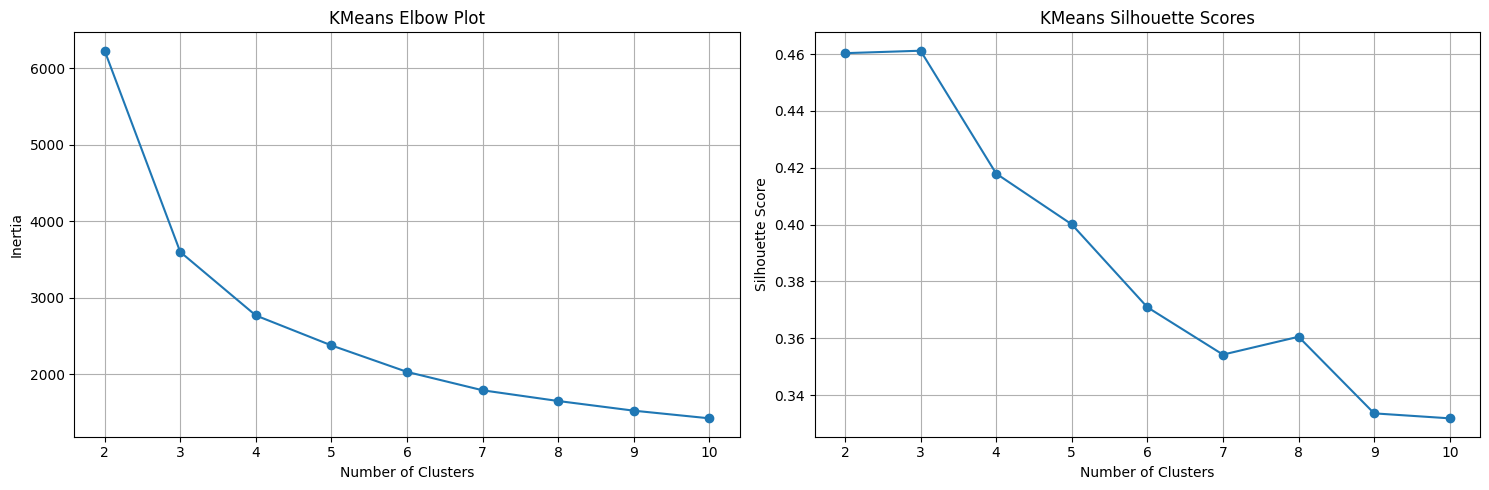

In [4]:
max_k = 10

inertia = []
silhouette = []

k_vals = range(2, max_k + 1)

for k in k_vals:
    
    kmeans = KMeans(n_clusters=k, random_state=1, max_iter=1000)
    
    cluster_labs = kmeans.fit_predict(scaled_df)
    
    s_score = silhouette_score(scaled_df, cluster_labs)
    
    silhouette.append(s_score)
    inertia.append(kmeans.inertia_)
    

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(k_vals, inertia, marker='o')
plt.title("KMeans Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(k_vals)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_vals, silhouette, marker='o')
plt.title("KMeans Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(k_vals)
plt.grid(True)

plt.tight_layout()
plt.show()

Looks like either 3 or 4 clusters could work. k = 3 had a higher silhouette score, meaning there was less overlap between clusters so I'll use k=3 for the rest of this notebook.

## KMeans

In [5]:
kmeans = KMeans(n_clusters=3, random_state=1, max_iter=1000)
cluster_labs = kmeans.fit_predict(scaled_df)

cluster_labs

array([0, 1, 2, ..., 2, 1, 0], dtype=int32)

In [6]:
#Load non-outliers df
non_outliers_df = load_analysis_data("tbc_no_outliers.csv")

non_outliers_df["Cluster"] = cluster_labs
non_outliers_df.head(5)

,CustomerID,LTDValue,PurchaseFrequency,MostRecentPurchase,PurchaseRecencyDays,Cluster
2,12348.0,1437.24,4,2011-09-25 13:13:00,74,0
3,12349.0,1457.55,1,2011-11-21 09:51:00,18,1
4,12350.0,294.40,1,2011-02-02 16:01:00,309,2
5,12352.0,2226.04,8,2011-11-03 14:37:00,35,0
6,12353.0,89.00,1,2011-05-19 17:47:00,203,2


## KMeans Analysis

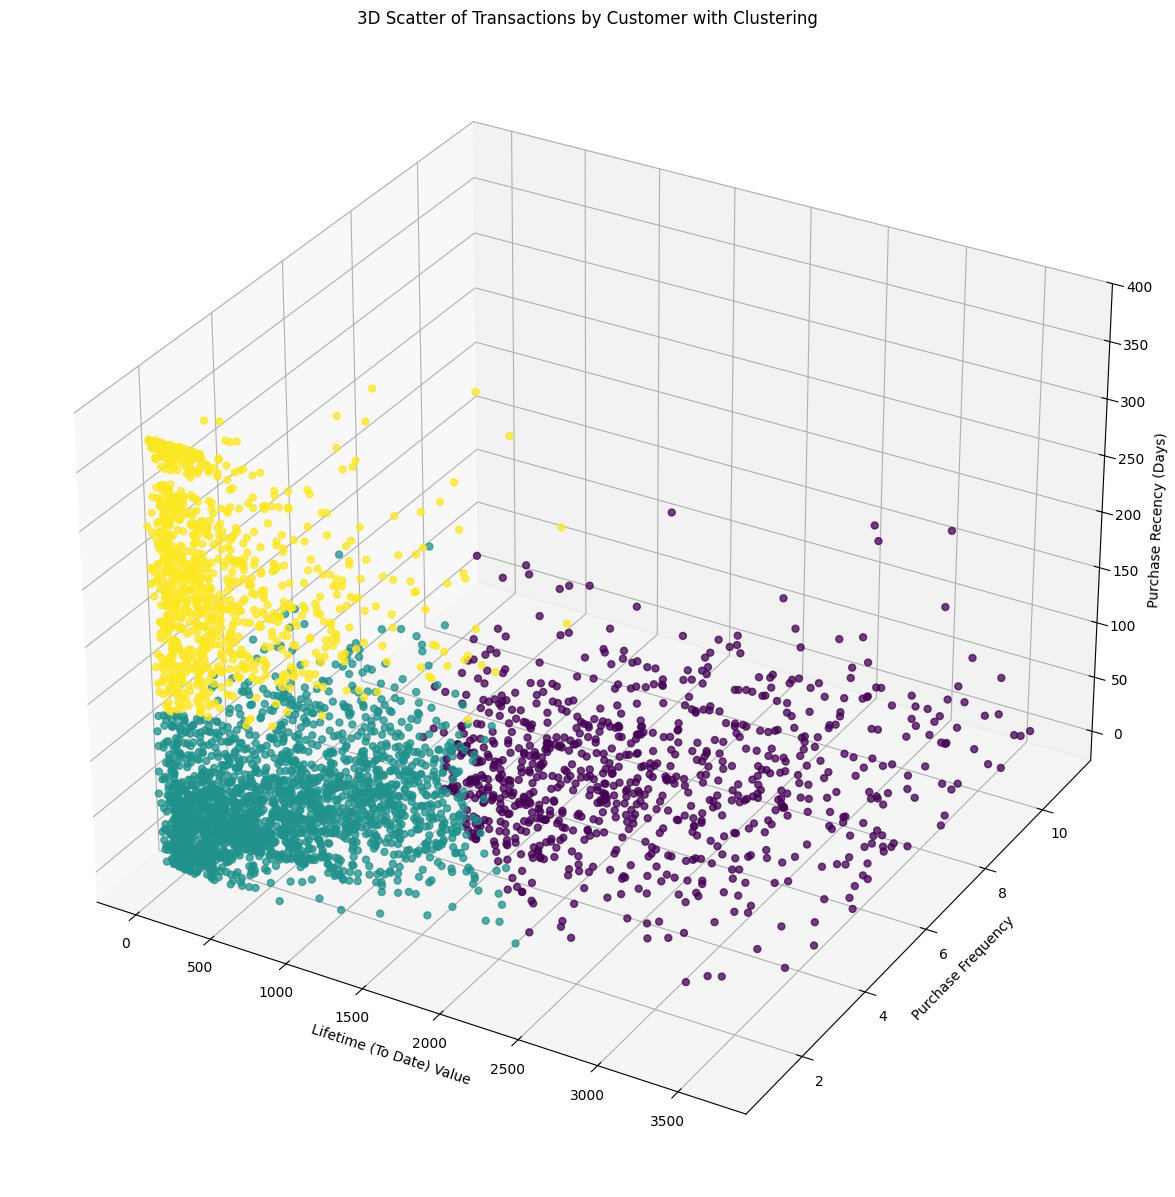

In [7]:
#Plot clusters

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(non_outliers_df["LTDValue"],
                     non_outliers_df["PurchaseFrequency"],
                     non_outliers_df["PurchaseRecencyDays"],
                     c=non_outliers_df["Cluster"],
                     marker='o', 
                     alpha=0.75,
                     s=25)

ax.set_xlabel("Lifetime (To Date) Value")
ax.set_ylabel("Purchase Frequency")
ax.set_zlabel("Purchase Recency (Days)")

ax.set_title("3D Scatter of Transactions by Customer with Clustering")
plt.show()


/var/folders/hz/qryn97wj0_d33crxxrwm28t80000gn/T/ipykernel_15782/3875306797.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = non_outliers_df["Cluster"], y=non_outliers_df["LTDValue"], palette=["red", "blue", "green"])
/var/folders/hz/qryn97wj0_d33crxxrwm28t80000gn/T/ipykernel_15782/3875306797.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = non_outliers_df["Cluster"], y=non_outliers_df["PurchaseFrequency"], palette=["red", "blue", "green"])
/var/folders/hz/qryn97wj0_d33crxxrwm28t80000gn/T/ipykernel_15782/3875306797.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `le

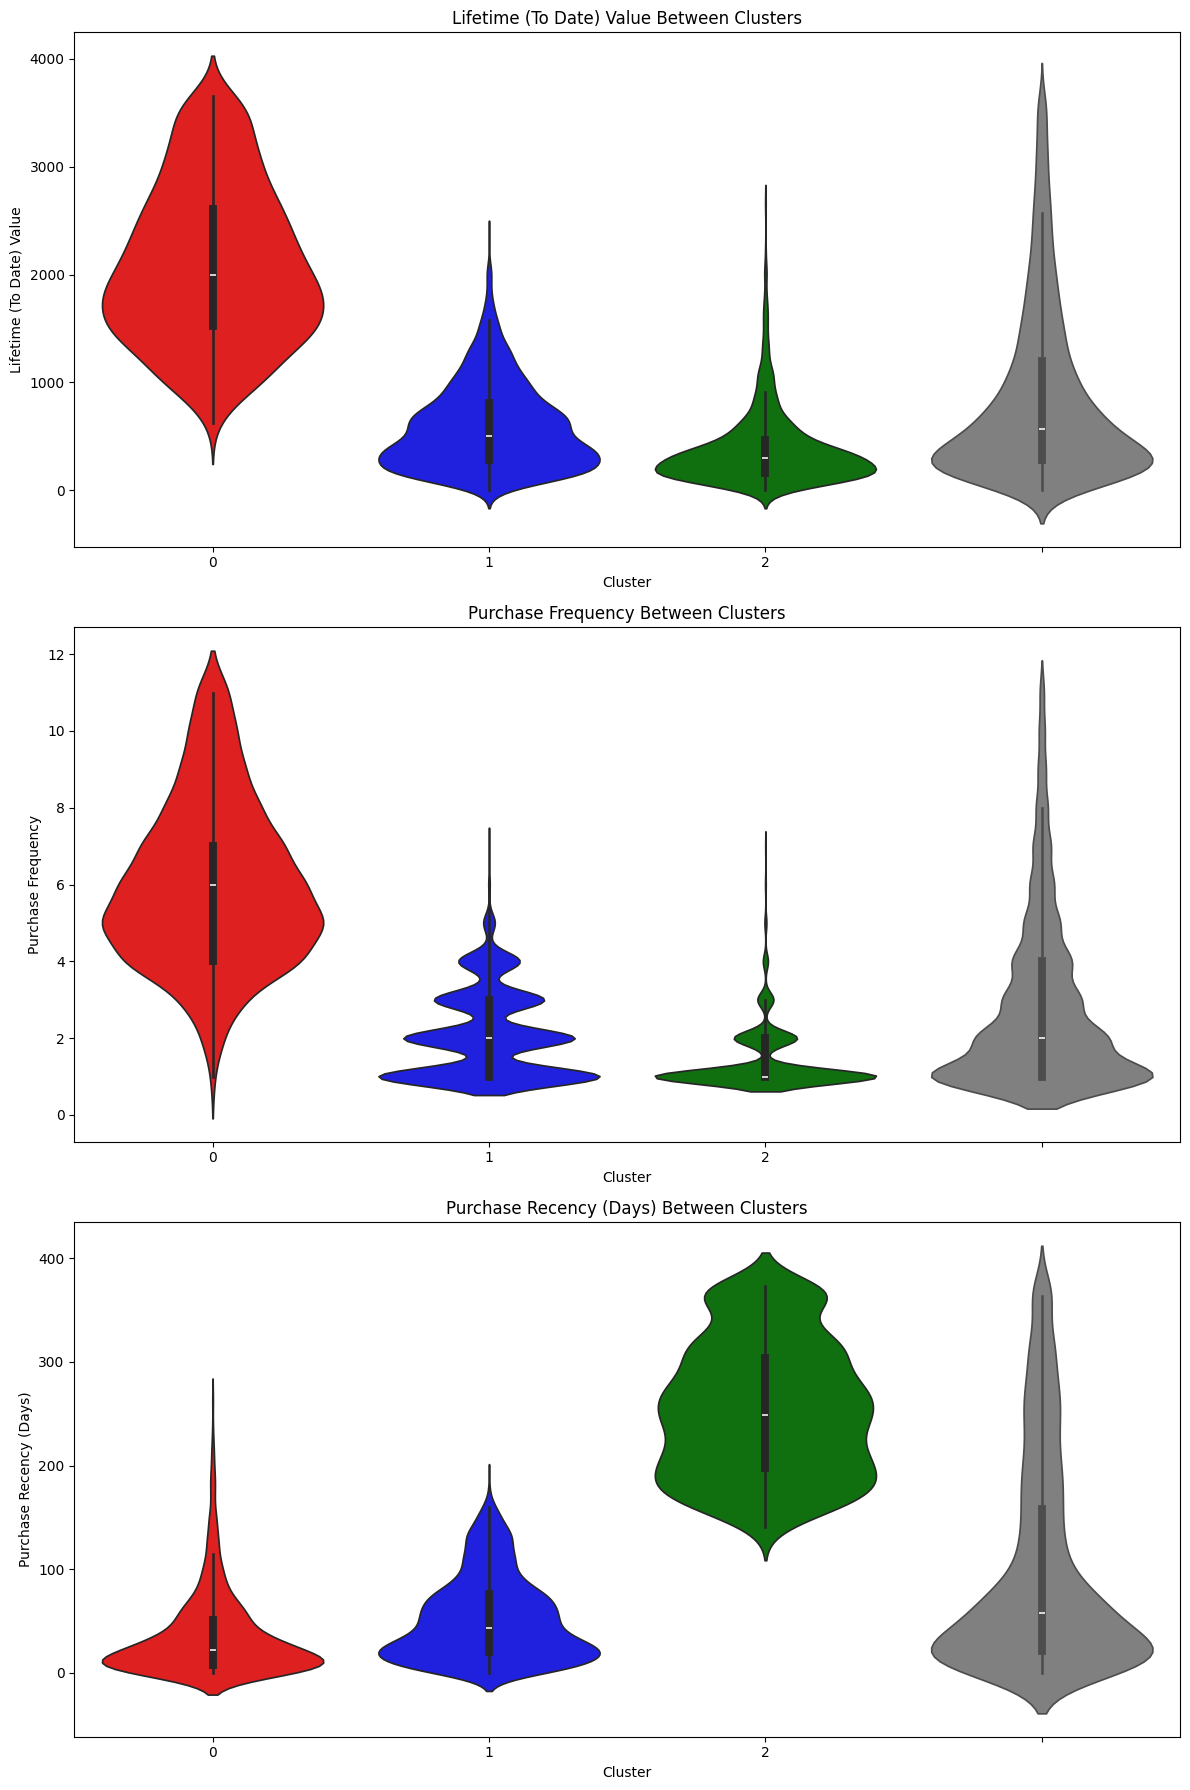

In [8]:
#Violin plot of each cluster
plt.figure(figsize = (12,18))

plt.subplot(3,1,1)
sns.violinplot(x = non_outliers_df["Cluster"], y=non_outliers_df["LTDValue"], palette=["red", "blue", "green"])
sns.violinplot(y=non_outliers_df["LTDValue"], color="grey")
plt.ylabel("Lifetime (To Date) Value")
plt.title("Lifetime (To Date) Value Between Clusters")

plt.subplot(3,1,2)
sns.violinplot(x = non_outliers_df["Cluster"], y=non_outliers_df["PurchaseFrequency"], palette=["red", "blue", "green"])
sns.violinplot(y=non_outliers_df["PurchaseFrequency"], color="grey")
plt.ylabel("Purchase Frequency")
plt.title("Purchase Frequency Between Clusters")

plt.subplot(3,1,3)
sns.violinplot(x = non_outliers_df["Cluster"], y=non_outliers_df["PurchaseRecencyDays"], palette=["red", "blue", "green"])
sns.violinplot(y=non_outliers_df["PurchaseRecencyDays"], color="grey")
plt.ylabel("Purchase Recency (Days)")
plt.title("Purchase Recency (Days) Between Clusters")

plt.tight_layout()
plt.show()


/var/folders/hz/qryn97wj0_d33crxxrwm28t80000gn/T/ipykernel_15782/1008486.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = non_outliers_df["Cluster"], y=non_outliers_df["LTDValue"], palette=["red", "blue", "green"])
/var/folders/hz/qryn97wj0_d33crxxrwm28t80000gn/T/ipykernel_15782/1008486.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = non_outliers_df["Cluster"], y=non_outliers_df["PurchaseFrequency"], palette=["red", "blue", "green"])
/var/folders/hz/qryn97wj0_d33crxxrwm28t80000gn/T/ipykernel_15782/1008486.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for

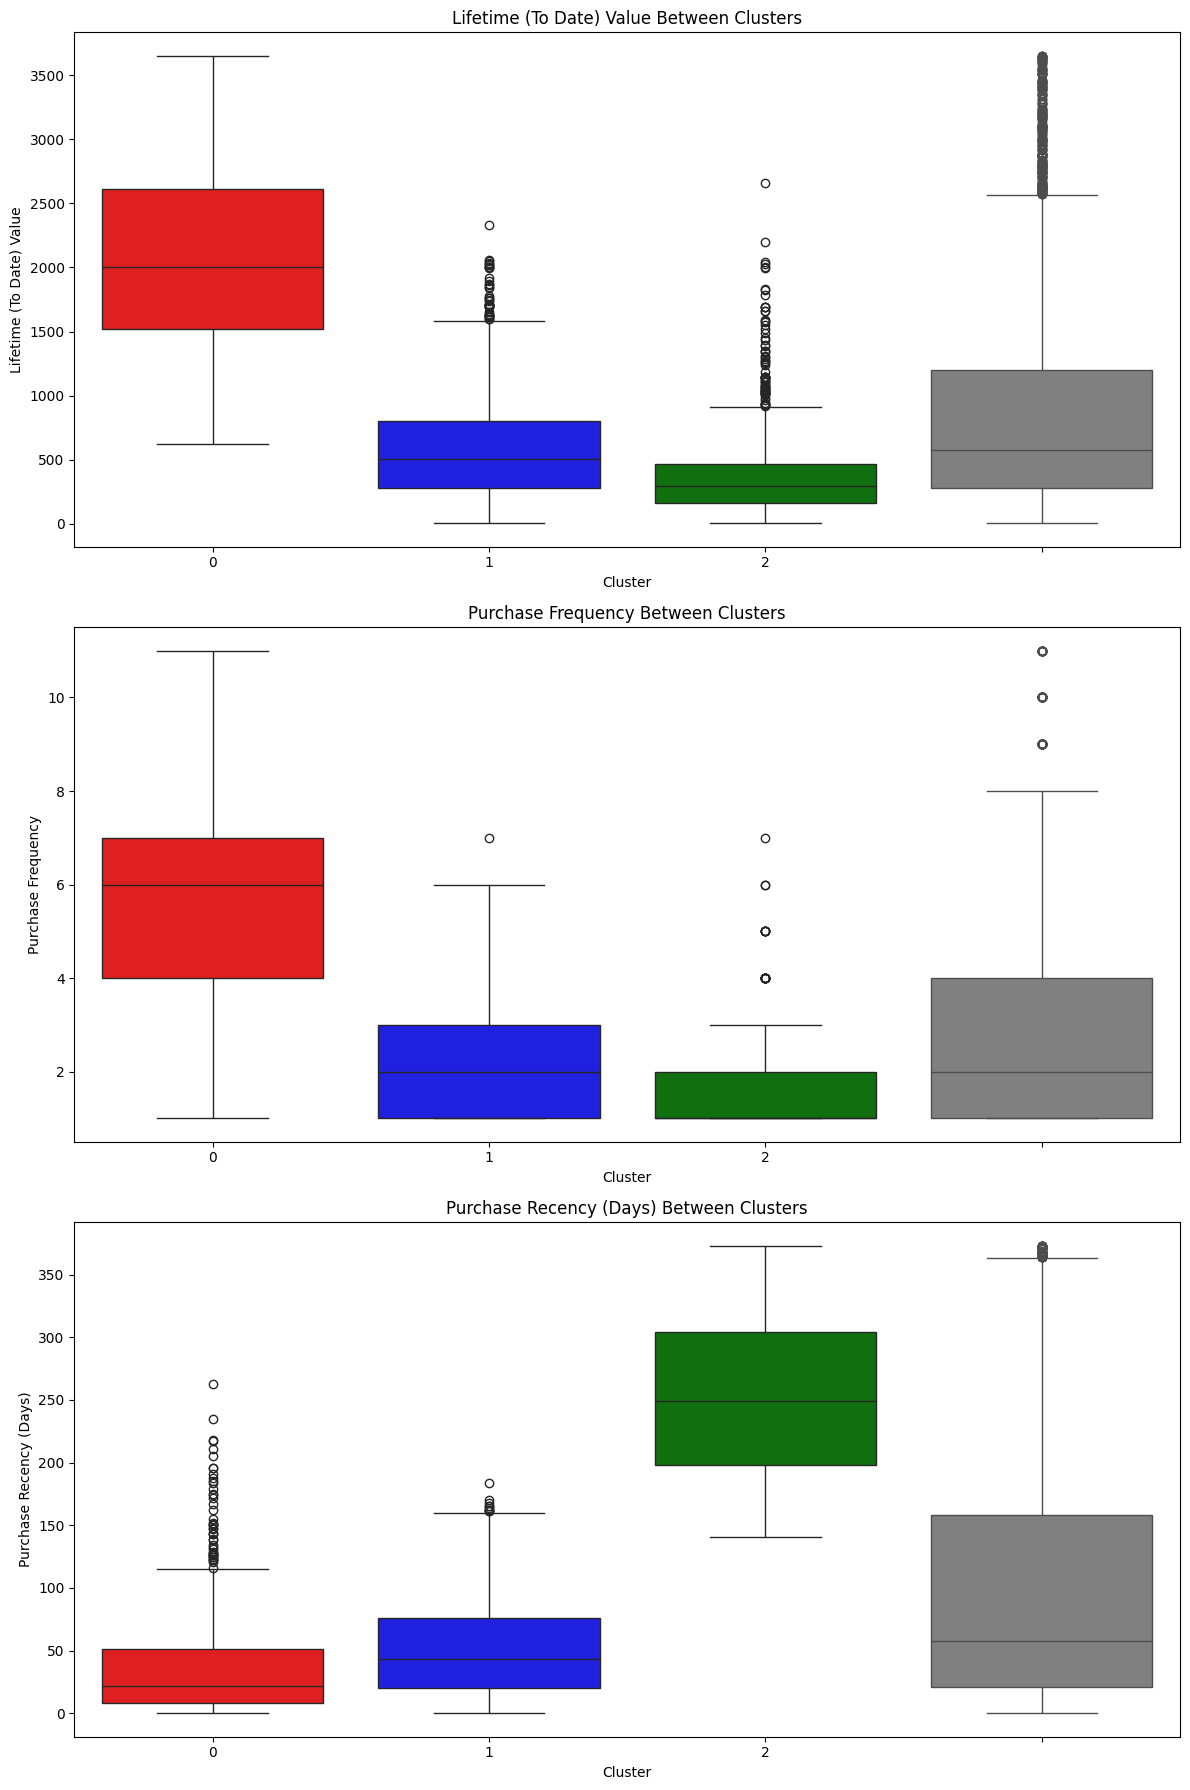

In [9]:
plt.figure(figsize = (12,18))

plt.subplot(3,1,1)
sns.boxplot(x = non_outliers_df["Cluster"], y=non_outliers_df["LTDValue"], palette=["red", "blue", "green"])
sns.boxplot(y=non_outliers_df["LTDValue"], color="grey")
plt.ylabel("Lifetime (To Date) Value")
plt.title("Lifetime (To Date) Value Between Clusters")

plt.subplot(3,1,2)
sns.boxplot(x = non_outliers_df["Cluster"], y=non_outliers_df["PurchaseFrequency"], palette=["red", "blue", "green"])
sns.boxplot(y=non_outliers_df["PurchaseFrequency"], color="grey")
plt.ylabel("Purchase Frequency")
plt.title("Purchase Frequency Between Clusters")

plt.subplot(3,1,3)
sns.boxplot(x = non_outliers_df["Cluster"], y=non_outliers_df["PurchaseRecencyDays"], palette=["red", "blue", "green"])
sns.boxplot(y=non_outliers_df["PurchaseRecencyDays"], color="grey")
plt.ylabel("Purchase Recency (Days)")
plt.title("Purchase Recency (Days) Between Clusters")

plt.tight_layout()
plt.show()

### KMeans label analysis
RED[0]: GROWTH-- This group has the highest lifetime value and seem to shop fairly frequently. However, they do not seem to be shopping relatively recently. We should focus on getting this group back into our store more regularly so they can continue generating value.

BLUE[1]: REPAIR -- This group has relatively low lifetime value, low frequency, and low recency. We need to focus on getting this group more engaged in our store.

GREEN[2]: CAPTURE -- This group seems to have shopped very recently though it may have been their first time or a one-off visit as their frequency and lifetime values are low. Since they've visited us recently, we should focus on capturing their business and converting them into recurring customers. 

## Outlier Analysis

In [10]:
#Load outlier data

LTD_ouliers_only = load_analysis_data("LTD_outliers_only.csv")
Freq_outliers_only = load_analysis_data("Freq_outliers_only.csv")
overlap_outliers = load_analysis_data("LTD_and_Freq_outliers_only.csv")


In [11]:
outliers_clustered_df = pd.concat([LTD_ouliers_only, Freq_outliers_only, overlap_outliers])

outliers_clustered_df

,CustomerID,LTDValue,PurchaseFrequency,MostRecentPurchase,PurchaseRecencyDays,Cluster
0,12346.0,77183.60,1,2011-01-18 10:01:00,325,-1
1,12347.0,4310.00,7,2011-12-07 15:52:00,1,-1
10,12357.0,6207.67,1,2011-11-06 16:07:00,32,-1
12,12359.0,6372.58,4,2011-10-13 12:47:00,57,-1
15,12362.0,4737.23,10,2011-12-06 15:40:00,2,-1
...,...,...,...,...,...,...
4251,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3
4271,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3
4290,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3
4292,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3


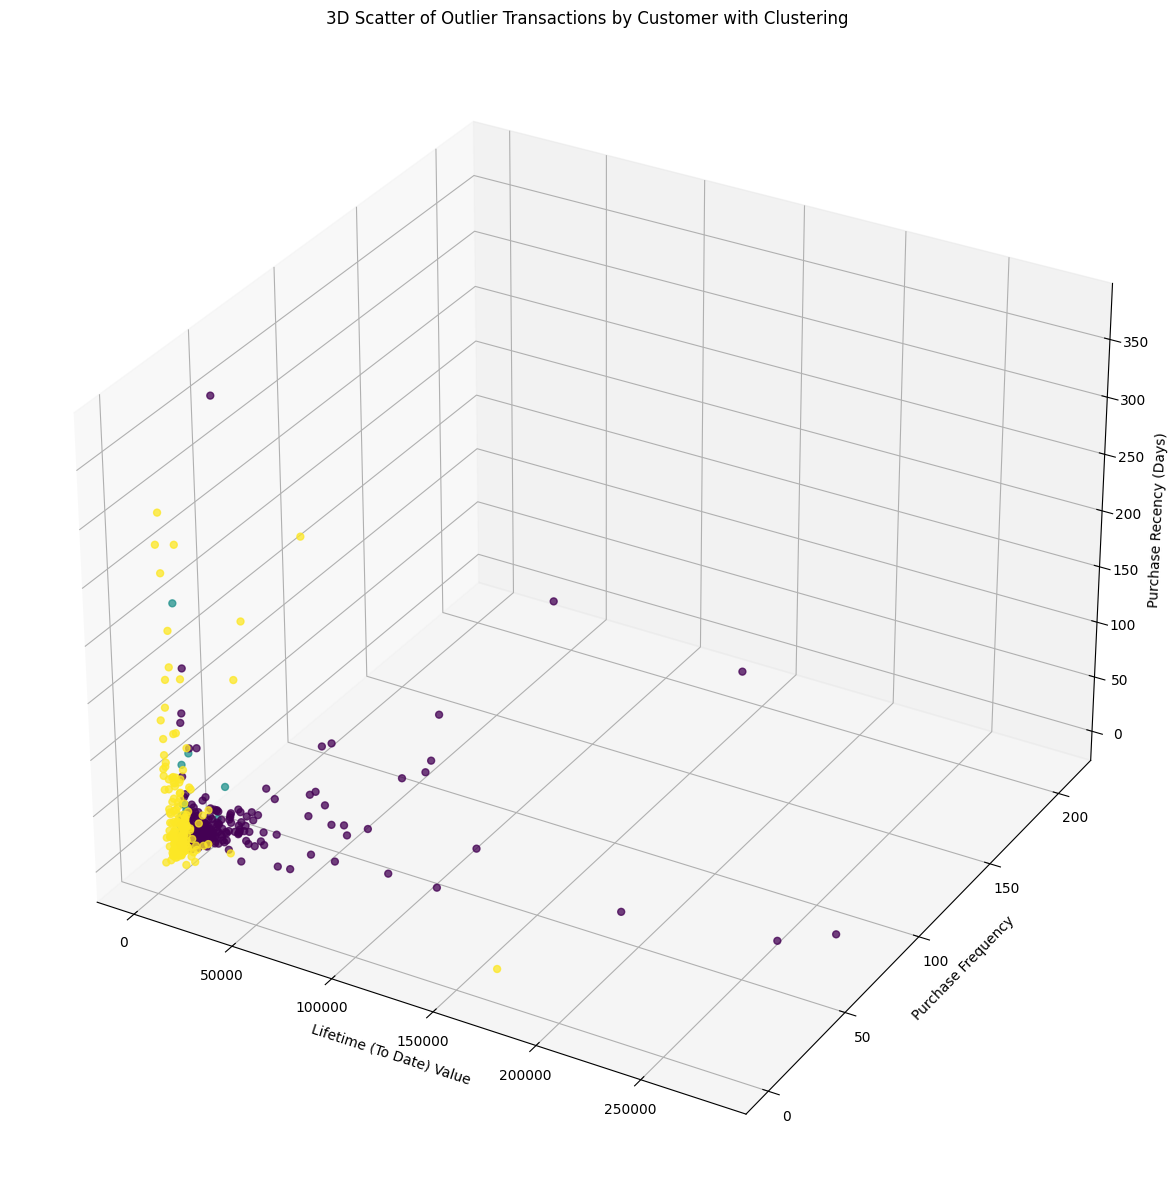

In [12]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(outliers_clustered_df["LTDValue"],
                     outliers_clustered_df["PurchaseFrequency"],
                     outliers_clustered_df["PurchaseRecencyDays"],
                     c=outliers_clustered_df["Cluster"],
                     marker='o', 
                     alpha=0.75,
                     s=25)

ax.set_xlabel("Lifetime (To Date) Value")
ax.set_ylabel("Purchase Frequency")
ax.set_zlabel("Purchase Recency (Days)")

ax.set_title("3D Scatter of Outlier Transactions by Customer with Clustering")
plt.show()

/var/folders/hz/qryn97wj0_d33crxxrwm28t80000gn/T/ipykernel_15782/4029825073.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = outliers_clustered_df["Cluster"], y=outliers_clustered_df["LTDValue"], palette=["red", "blue", "green"])
/var/folders/hz/qryn97wj0_d33crxxrwm28t80000gn/T/ipykernel_15782/4029825073.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = outliers_clustered_df["Cluster"], y=outliers_clustered_df["PurchaseFrequency"], palette=["red", "blue", "green"])
/var/folders/hz/qryn97wj0_d33crxxrwm28t80000gn/T/ipykernel_15782/4029825073.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

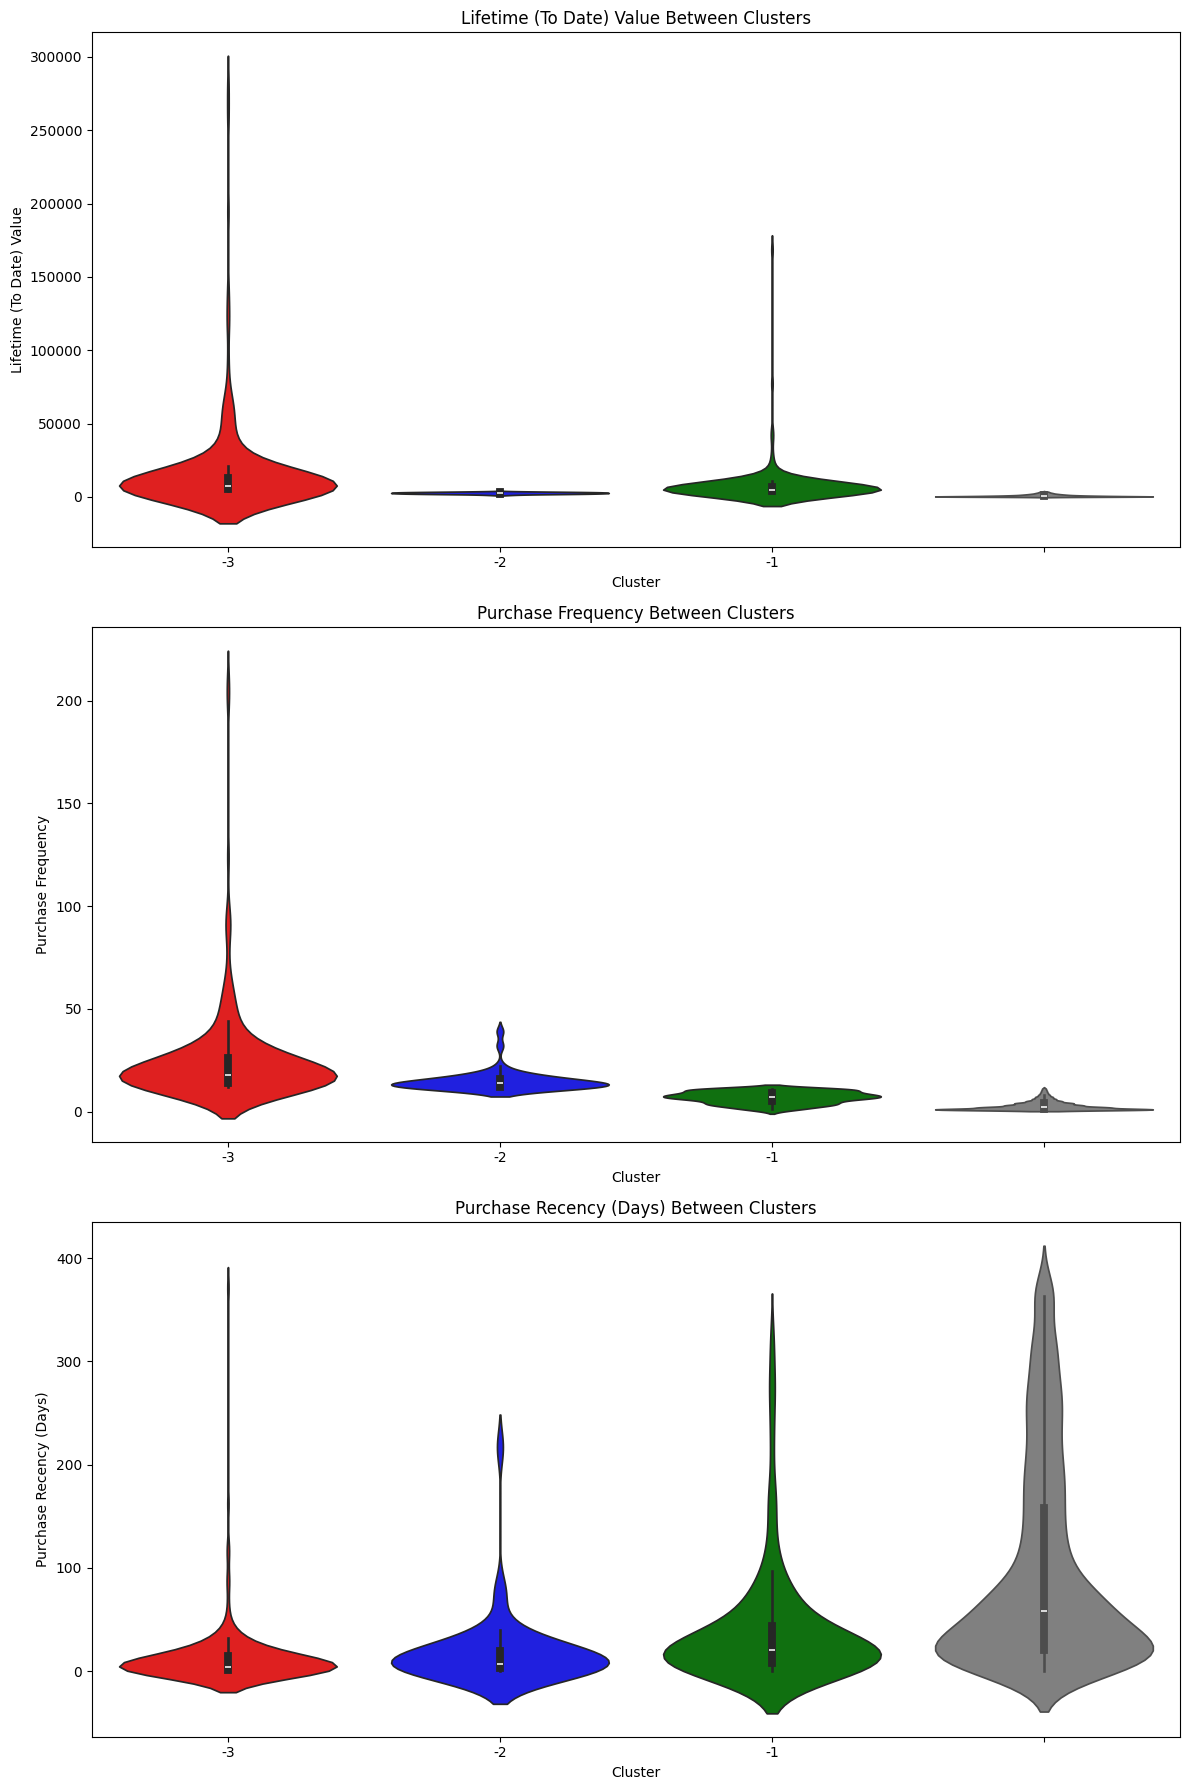

In [13]:
#Violin Plot of Outliers
plt.figure(figsize = (12,18))

plt.subplot(3,1,1)
sns.violinplot(x = outliers_clustered_df["Cluster"], y=outliers_clustered_df["LTDValue"], palette=["red", "blue", "green"])
sns.violinplot(y=non_outliers_df["LTDValue"], color="grey")
plt.ylabel("Lifetime (To Date) Value")
plt.title("Lifetime (To Date) Value Between Clusters")

plt.subplot(3,1,2)
sns.violinplot(x = outliers_clustered_df["Cluster"], y=outliers_clustered_df["PurchaseFrequency"], palette=["red", "blue", "green"])
sns.violinplot(y=non_outliers_df["PurchaseFrequency"], color="grey")
plt.ylabel("Purchase Frequency")
plt.title("Purchase Frequency Between Clusters")

plt.subplot(3,1,3)
sns.violinplot(x = outliers_clustered_df["Cluster"], y=outliers_clustered_df["PurchaseRecencyDays"], palette=["red", "blue", "green"])
sns.violinplot(y=non_outliers_df["PurchaseRecencyDays"], color="grey")
plt.ylabel("Purchase Recency (Days)")
plt.title("Purchase Recency (Days) Between Clusters")

plt.tight_layout()
plt.show()

/var/folders/hz/qryn97wj0_d33crxxrwm28t80000gn/T/ipykernel_15782/3253177599.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = outliers_clustered_df["Cluster"], y=outliers_clustered_df["LTDValue"], palette=["red", "blue", "green"])
/var/folders/hz/qryn97wj0_d33crxxrwm28t80000gn/T/ipykernel_15782/3253177599.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = outliers_clustered_df["Cluster"], y=outliers_clustered_df["PurchaseFrequency"], palette=["red", "blue", "green"])
/var/folders/hz/qryn97wj0_d33crxxrwm28t80000gn/T/ipykernel_15782/3253177599.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to

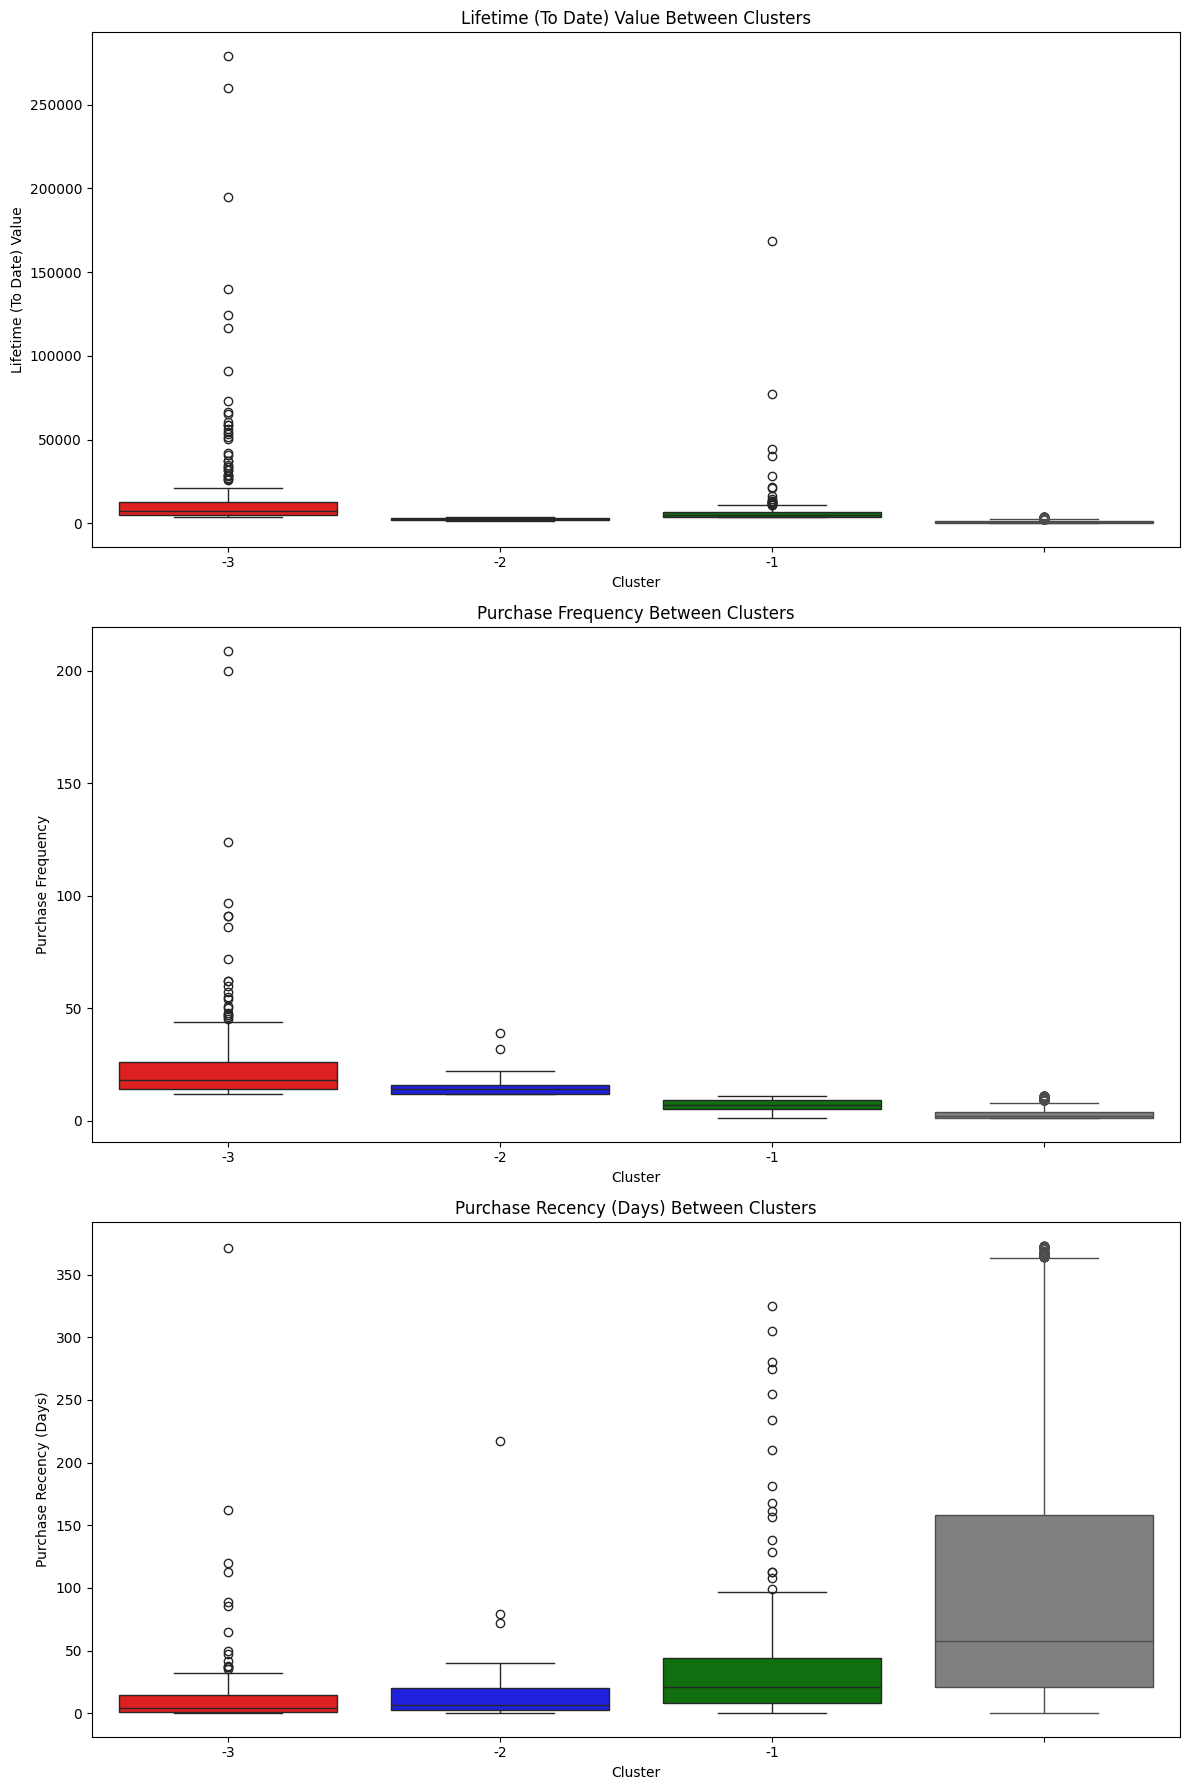

In [15]:
plt.figure(figsize = (12,18))

plt.subplot(3,1,1)
sns.boxplot(x = outliers_clustered_df["Cluster"], y=outliers_clustered_df["LTDValue"], palette=["red", "blue", "green"])
sns.boxplot(y=non_outliers_df["LTDValue"], color="grey")
plt.ylabel("Lifetime (To Date) Value")
plt.title("Lifetime (To Date) Value Between Clusters")

plt.subplot(3,1,2)
sns.boxplot(x = outliers_clustered_df["Cluster"], y=outliers_clustered_df["PurchaseFrequency"], palette=["red", "blue", "green"])
sns.boxplot(y=non_outliers_df["PurchaseFrequency"], color="grey")
plt.ylabel("Purchase Frequency")
plt.title("Purchase Frequency Between Clusters")

plt.subplot(3,1,3)
sns.boxplot(x = outliers_clustered_df["Cluster"], y=outliers_clustered_df["PurchaseRecencyDays"], palette=["red", "blue", "green"])
sns.boxplot(y=non_outliers_df["PurchaseRecencyDays"], color="grey")
plt.ylabel("Purchase Recency (Days)")
plt.title("Purchase Recency (Days) Between Clusters")

plt.tight_layout()
plt.show()

### Outlier label analysis

-3: HIGH-VALUE KEEPERS -- These customers don't have the highest purchase recency but tend to buy fairly frequently and **very** expensively. We should focus on retaining this group at all costs as they consistently provide a high lifetime value. Consider special deals, promotions, or product offerings for this group. 

-2: UPSELLERS -- This group has a comparitvely low lifetime value but tend to spend frequently and recently. We should focus our nudges on these customers to encourage them to continue visiting our store and spending. Tailoring recommendations based on their previous purchases may prove helpful here.

-1: ENCOURAGERS -- This group seems to spend a decent amount and have shopped fairly recently. However, they don't appear to shop as often as the UPSELLERS. We should focus on getting these customers into our store more frequently while keeping them happy with sales, promotions, and offers.

## Full Data Set Analysis & Visualization

In [ ]:
full_cluster_df = pd.concat([non_outliers_df, outliers_clustered_df])

label_mapper = {
    0:"GROWTH",
    1:"REPAIR",
    2:"CAPTURE",
    -1:"HIGH-VALUE KEEPERS",
    -2:"UPSELLERS",
    -3:"ENCOURAGERS"
}

full_cluster_df["Label"] = full_cluster_df["Cluster"].map(label_mapper)
full_cluster_df




,CustomerID,LTDValue,PurchaseFrequency,MostRecentPurchase,PurchaseRecencyDays,Cluster,Label
2,12348.0,1437.24,4,2011-09-25 13:13:00,74,0,GROWTH
3,12349.0,1457.55,1,2011-11-21 09:51:00,18,1,REPAIR
4,12350.0,294.40,1,2011-02-02 16:01:00,309,2,CAPTURE
5,12352.0,2226.04,8,2011-11-03 14:37:00,35,0,GROWTH
6,12353.0,89.00,1,2011-05-19 17:47:00,203,2,CAPTURE
...,...,...,...,...,...,...,...
4251,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3,ENCOURAGERS
4271,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3,ENCOURAGERS
4290,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3,ENCOURAGERS
4292,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3,ENCOURAGERS


In [37]:
CID_mapper = full_cluster_df[["CustomerID", "Label"]].set_index("CustomerID").to_dict()

CID_mapper = CID_mapper.get("Label")

CID_mapper

{12348.0: 'GROWTH',
 12349.0: 'REPAIR',
 12350.0: 'CAPTURE',
 12352.0: 'GROWTH',
 12353.0: 'CAPTURE',
 12354.0: 'CAPTURE',
 12355.0: 'CAPTURE',
 12356.0: 'GROWTH',
 12358.0: 'REPAIR',
 12360.0: 'GROWTH',
 12361.0: 'CAPTURE',
 12363.0: 'REPAIR',
 12364.0: 'REPAIR',
 12365.0: 'CAPTURE',
 12367.0: 'REPAIR',
 12370.0: 'GROWTH',
 12371.0: 'REPAIR',
 12372.0: 'REPAIR',
 12373.0: 'CAPTURE',
 12374.0: 'REPAIR',
 12375.0: 'REPAIR',
 12377.0: 'CAPTURE',
 12379.0: 'REPAIR',
 12380.0: 'GROWTH',
 12381.0: 'REPAIR',
 12383.0: 'GROWTH',
 12384.0: 'REPAIR',
 12386.0: 'CAPTURE',
 12388.0: 'GROWTH',
 12390.0: 'REPAIR',
 12391.0: 'REPAIR',
 12393.0: 'GROWTH',
 12394.0: 'REPAIR',
 12397.0: 'GROWTH',
 12398.0: 'REPAIR',
 12399.0: 'REPAIR',
 12401.0: 'CAPTURE',
 12402.0: 'CAPTURE',
 12403.0: 'REPAIR',
 12405.0: 'REPAIR',
 12406.0: 'GROWTH',
 12407.0: 'GROWTH',
 12408.0: 'GROWTH',
 12410.0: 'CAPTURE',
 12412.0: 'REPAIR',
 12413.0: 'REPAIR',
 12414.0: 'CAPTURE',
 12417.0: 'GROWTH',
 12418.0: 'REPAIR',
 12420.

In [48]:
clean_data = load_clean_data()

Data loaded successfully.


In [49]:
clean_data["Label"] = clean_data["CustomerID"].map(CID_mapper)

clean_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Label
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,ENCOURAGERS
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,ENCOURAGERS
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,ENCOURAGERS
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,ENCOURAGERS
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,ENCOURAGERS
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,REPAIR
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,REPAIR
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,REPAIR
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,REPAIR


In [54]:
## Create visualization
color_mapper = {
    "GROWTH":"#ef476f",
    "REPAIR":"#f78c6b",
    "CAPTURE":"#ffd166",
    "HIGH-VALUE KEEPERS":"#06d6a0",
    "UPSELLERS":"#118ab2",
    "ENCOURAGERS":"#073b4c"
    
}